In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

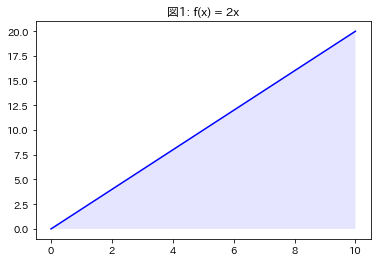

In [2]:
def f(x):
    """
    f(x)=2x
    :param x: x
    :return: 2x
    """
    return 2 * x


t = np.linspace(0, 10, 100)
plt.plot(t, f(t), color='b')
plt.title('図1: f(x) = 2x')
plt.fill_between(t, np.zeros(100), f(t), facecolor='b', alpha=0.1)

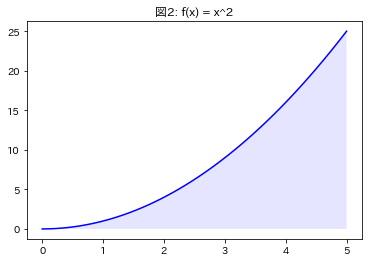

In [3]:
def f(x):
    """
    f(x)=x^2
    :param x: x
    :return: x^2
    """
    return x ** 2


t = np.linspace(0, 5, 100)
plt.plot(t, f(t), color='b')
plt.title('図2: f(x) = x^2')
plt.fill_between(t, np.zeros(100), f(t), facecolor='b', alpha=0.1)

In [4]:
def f(x):
    """
     f(x)=x^2
    :param x: x
    :return: x^2
    """
    return x ** 2

In [5]:
def one_sixth(alpha, beta):
    """
    1/6公式
    :param alpha: α
    :param beta: β
    :return: 曲線や直線に囲まれた領域の面積
    """
    # 長方形の部分の面積
    area_square = (beta - alpha) * (alpha ** 2)

    # Aの面積
    area_a = ((beta - alpha) ** 3) / 6

    # Bの面積
    return area_square - area_a


one_sixth(-5, 5)

83.33333333333334

In [6]:
def riemann_integral(alpha, beta, n):
    """
    リーマン積分
    :param alpha: α
    :param beta: β
    :param n: 分割数
    :return: 曲線や直線に囲まれた面積
    """
    d = (beta - alpha) / n
    s = 0

    for i in range(n):
        s += d * f(alpha + (i + 1) * d)

    return s


riemann_integral(-5, 5, 10000)

83.33333499999962

In [7]:
from scipy import integrate

y, abserr = integrate.quad(f, -5, 5)
pd.DataFrame([[y, abserr]], columns=['積分した結果 (y)', '推定誤差 (abserr)'])

,積分した結果 (y),推定誤差 (abserr)
0,83.333333,9.251859e-13


In [8]:
print('リーマン積分 (独自実装)')
%time x = [riemann_integral(-5, 5, 10000) for i in range(1000)]

リーマン積分 (独自実装)
CPU times: user 3.11 s, sys: 28.6 ms, total: 3.14 s
Wall time: 3.17 s


In [9]:
print('SciPy')
%time x = [integrate.quad(f, -5, 5) for i in range(1000)]

SciPy
CPU times: user 13.4 ms, sys: 1.05 ms, total: 14.4 ms
Wall time: 14.5 ms


In [10]:
print('1/6公式')
%time x = [one_sixth(-5, 5) for i in range(1000)]

1/6公式
CPU times: user 845 µs, sys: 40 µs, total: 885 µs
Wall time: 922 µs


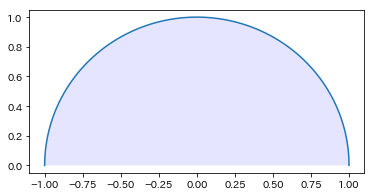

In [11]:
t = np.linspace(0, np.pi, 100)
plt.figure(figsize=(6, 3))
plt.plot(np.cos(t), np.sin(t))
plt.fill_between(np.cos(t), np.zeros(100), np.sin(t), facecolor='b', alpha=0.1)

In [12]:
# 正解例

def riemann_integral(alpha, beta, n):
    """
    リーマン積分
    :param alpha: α
    :param beta: β
    :param n: 分割数
    :return: 曲線や直線に囲まれた面積
    """
    t = np.linspace(alpha, beta, n)
    s = 0

    for i in range(n - 1):
        s += np.sin(t[i]) * np.abs(np.cos(t[i + 1]) - np.cos(t[i]))

    return s


pd.DataFrame([[riemann_integral(0, np.pi, 10000), np.pi / 2]], columns=['リーマン積分 (独自実装)', 'pi/2'])

,リーマン積分 (独自実装),pi/2
0,1.570796,1.570796
